<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

## 03-3 특성 공학과 규제

앞서 다항회귀로 농어의 무게를 어느 정도 예측할 수 있었지만 여전히 훈련 세트보다 테스트 세트의 점수가 높았다. 이를 해결하려면 제곱보다 더 고차항을 넣어야 할 것 같은데 어떻게 넣어야 하는지 이제부터 배워보자.

### - 다중 회귀

앞서 우리는 하나의 특성을 사용하여 선형 회귀 모델을 훈련시켰다. 여러 개의 특성을 사용한 선형 회귀를 다중 회귀라고 부른다.
1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선이고 2개의 특성이면 평면을 학습한다.
하지만 3차원 공간 이상을 그리거나 상상할 수 없다. 하지만 분명한 것은 선형 회귀를 단순한 직선이나 평면으로 생각하여 성능이 무조건 낮다고 오해해서는 안된다.

이번엔 농어의 길이 뿐만아니라 농어의 높이와 두께도 함께 사용해보자. 또한 앞에서 했던 것처럼 3개의 특성을 각각 제곱하여 추가한다. 거기에 각 특성을 곱해서 또 다른 특성을 만들자. 즉 '농어 길이 x 농어 높이'를 새로운 특성으로 만드는 것이다 이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성 공학이라고 부른다.

### - 데이터 준비

농어의 특성이 3개로 늘어났기 때문에 데이터를 복사해서 붙여넣는 것도 번거롭다.
데이터를 불러올때 판다스를 사용하면 아주 편리하다.
판다스는 유명한 데이터 분석 라이브러리이다. 데이터프레임은 판다스의 핵심 데이터 구조이다. 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있지만 훨씬 더 많은 기능을 제공한다.
판다스 데이터프레임을 만들기 위해 많이 사용하는 파일은 csv 파일이다. 

판다스의 read_csv() 함수에 주소를 넣어 주면 데이터를 간편하게 읽을 수 있다. read_csv() 함수로 데이터프레임을 만든 다음 to_numpy() 메서드를 사용해 넘파이 배열로 바꾼다.
데이터 출처 : https://github.com/rickiepark/hg-mldl

In [1]:
import pandas as pd
df = pd.read_csv('/home/jaeyoon89/hg-mldl/perch_full.csv')

In [2]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터는 이전과 동일한 방식으로 준비한다.

In [3]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

그 다음 perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눈다.

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

이 데이터를 사용해 새로운 특성을 만들자.

### - 사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 변환기(transformer)라고 부른다. 변환기 클래스는 모두 fit(), transform() 메서드를 제공한다.

우리가 사용할 변환기는 PolynomialFeatures 클래스이다. 이 클래스는 sklearn.preprocessing 패키지에 포함되어 있다.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보자. 앞서 이야기한 것처럼 이 클래스의 객체를 만든 다음 fit(), transform() 메서드를 차례대로 호출한다.

In [6]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


fit() 메서드는 새롭게 만들 특성 조합을 찾고 transform() 메서드는 실제로 데이터를 변환한다. 변환기는 입력 데이터를 변환하는 데 타깃 데이터가 필요하지 않다. 따라서 모델 클래스와는 다르게 fit() 메서드에 입력 데이터만 전달했다. 즉 여기에서 2개의 특성을 가진 샘플 [2,3]이 6개의 특성을 가진 샘플 [1,2,3,4,6,9]로 바뀌었다.

PolynomialFeatures 클래스는 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다. 1은 왜 추가 되었을까? 사실 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다. 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요는 없다. include_bias=False로 지정하여 다시 특성을 변환하자.

In [7]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


이제 이 방식으로 train_input에 적용해보자. 그리고 이 배열의 크기를 확인해 보자.

In [8]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


PolynomailFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 아주 좋은 방법을 제공한다. 다음처럼 get_feature_names() 메서드를 호출하면 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려준다.

In [9]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

x0은 첫 번째 특성을 의미하고, x0^2는 첫 번째 특성이 제곱, x0, x1은 첫 번째 특성과 두 번째 특성의 곱을 나타내는 식이다. 이제 테스트 세트를 변환하자.

In [10]:
test_poly = poly.transform(test_input)

이어서 변환된 특성을 사용하여 다중 회귀 모델을 훈련해보자.

### - 다중 회귀 모델 훈련하기

다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같다. 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것 뿐이다. 먼저 사이킷런의 LinearRegression 클래스를 임포트하고 앞에서 만든 train_poly를 사용해 모델을 훈련시켜 보자.

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [12]:
print(lr.score(train_poly, train_target))

0.9903183436982124


점수가 높게 나왔다. 농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 추가했다. 특성이 늘어나면 선형 회귀의 능력은 매우 강하다는 것을 알 수 있다.
테스트 세트에 대한 점수도 확인해보자.

In [13]:
print(lr.score(test_poly, test_target))

0.9714559911594199


테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 과소적합 문제는 더이상 나타나지 않았따.
PolynomialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있다. 5제곱까지 특성을 만들어 출력해 보자.

In [14]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


특성의 개수가 55개가 나온다.이 데이터를 사용해 선형 회귀 모델을 다시 훈련하자.

In [15]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999997522


거의 완벽한 점수가 나왔다. 테스트 점수도 확인해보자.

In [16]:
print(lr.score(test_poly, test_target))

-144.40564434202673


아주 큰 음수가 나왔다. 특성의 개수를 크게 늘리면 선형 모델은 아주 강력해진다. 훈련 세트에 대해선 거의 완벽하게 학습할 수 있다. 하지만 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 만든다.

이 문제를 해결하려면 다시 특성을 줄여야한다. 

### - 규제

규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다. 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일이다.

앞서 55개의 특성으로 훈련한 선형 회귀 모델의 계수를 규제하여 훈련 세트의 점수를 낮추고 대신 테스트 세트의 점수를 높여보자.

그전에 특성의 스케일에 대해 생각해 보자. 특성이 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이 나게 된다. 이번엔 사이킷런에서 제공하는 StandardScaler 클래스를 사용하자. 

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

먼저 StandardScaler 클래스의 객체 ss를 초기화한 후 PolynomialFeatures 클래스로 만든 train_poly를 사용해 이 객체를 훈련한다. 테스트 세트도 꼭 변환기를 사용해 변환해 주어야 한다.

선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다.두 모델은 규제를 가하는 방법이 다르다. 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다. 일반적으로 릿지를 더 선호한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있다.

### - 릿지 회귀

릿지와 라쏘 모두 sklearn.linear_model 패키지 안에 있다. 앞서 준비한 train_scaled 데이터로 릿지 모델을 훈련해 보자.

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [20]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


테스트 세트 점수가 정상으로 돌아왔다. 확실히 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 나타내고 있다.
릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 모델 객체를 만들 때 alpha매개변수로 규제의 강도를 조절한다. alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다. alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.

적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 결정계수값의 그래프를 그려 보는 것이다. 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다.

In [21]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

아래 코드는 alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장한다.

In [22]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만든다.
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련한다.
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그려보자. alpha 값을 0.001부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 그래프 왼쪽이 너무 촘촘해진다. 그래서 로그함수로 바꾸어 지수로 표현하자. 즉 0.001은 -3, 0.01은 -2가 된다.

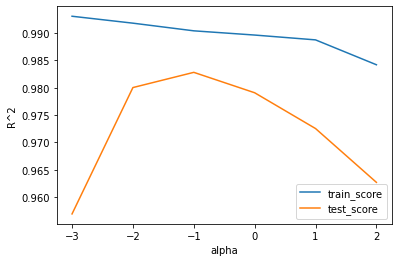

In [27]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_score', 'test_score'])
plt.show()

이 그래프 왼쪽을 보면 훈련 세트와 테스트 세트의 점수 차이가 아주 크다. 과대적합의 전형적인 모습이다. 반대로 오른쪽 편은 훈련 세트와 테스트 세트의 점수가 모두 낮아지는 과소적합으로 가는 모습을 보인다. 적절한 두 alpha 값은 두 그래프가 가장가까운 -1 즉 0.1 이다.
alpha 값을 0.1로 하여 최종 모델을 훈련하자.

In [28]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386834


이 모델은 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있다. 이제 라쏘 모델을 훈련해 보자.

### - 라쏘 회귀

라쏘 모델을 훈련하는 것은 릿지와 매우 비슷하다.

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


라쏘도 과대적합을 잘 억제한 결과를 보여준다. 테스트 세트의 점수도 확인해보자.

In [30]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


여기에서도 앞에서와 같이 alpha 값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수를 계산하자.

In [31]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    # 라쏘 모델을 만든다.
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련한다.
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장한다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/home/jaeyoon89/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/home/jaeyoon89/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


그다음 train_score와 test_score 리스트를 사용해 그래프를 그리자. 이 그래프도 x축은 로그 스케일로 바꿔 그려보자.

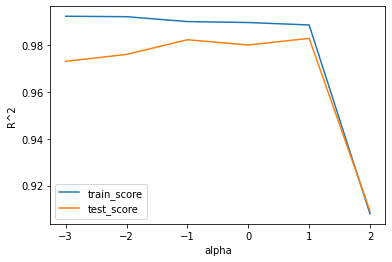

In [33]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train_score', 'test_score'])
plt.show()

이 그래프도 왼쪽은 과대적합을 보여주고 있고 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수가 좁혀지고 있다. 가장 오른쪽은 아주 크게 점수가 떨어진다. 이 지점은 분명 과소적합되는 모델일 것이다. 라쏘 모델에서 최적의 alpha 값은 1 즉 10이다. 이 값으로 다시 모델을 훈련해 보자.

In [34]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


특성을 많이 사용했지만 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높였다.
앞서 라쏘 모델은 계수 값을 아예 0으로 만들 수 있다고 했다. 라쏘 모델의 계수는 coef_속성에 저장되어 있다. 이중에 0인것을 헤아려보자.

In [35]:
print(np.sum(lasso.coef_ == 0))

40
